## MNIST Digit Prediction using Neural Network


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Reshaping the image into 1D, where the 2nd dimension here is the number of images.

The images are then normalized by dividing each value by 255 (max value).

In [4]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [5]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)      # The labels are turned into categories (encoded) which would be from 0-9
test_labels = to_categorical(test_labels)

In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense('512', activation='relu', input_shape=(28*28,)))   # Input layer with 512 units and Rectified Linear Unit activation function
model.add(layers.Dense('128', activation='relu'))                         # Hidden layer with 128 units
model.add(layers.Dense('10', activation='softmax'))                       # Output layer with 10 units and softmax activation function because the output would pe probability of image belonging to each category

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 17ms/step - loss: 0.2704 - accuracy: 0.9192 - val_loss: 0.1178 - val_accuracy: 0.9658
Epoch 2/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0994 - accuracy: 0.9692 - val_loss: 0.0978 - val_accuracy: 0.9712
Epoch 3/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0643 - accuracy: 0.9801 - val_loss: 0.0813 - val_accuracy: 0.9764
Epoch 4/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0430 - accuracy: 0.9860 - val_loss: 0.1118 - val_accuracy: 0.9720
Epoch 5/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0335 - accuracy: 0.9890 - val_loss: 0.0972 - val_accuracy: 0.9758
Epoch 6/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0235 - accuracy: 0.9926 - val_loss: 0.1085 - val_accuracy: 0.9758
Epoch 7/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0176 - accuracy: 0.9940 - val_loss: 0.1062 - val_accuracy: 0.9769

### Visualizing the Model's Performance

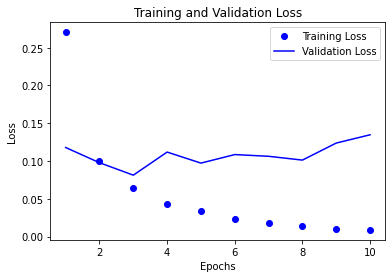

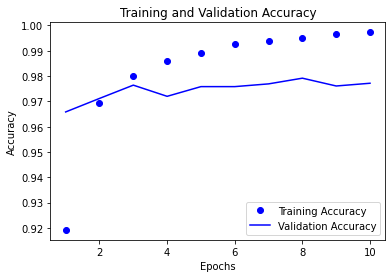

In [14]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The graphs show that the model has an excellent accuracy on training as well as validation data. Although there are little fluctuations which means that the model can be refined further, but the current accuracy looks promising.

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test loss: ", test_loss, ", Test Acc: ", test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.1032 - accuracy: 0.9790
Test loss:  0.10316701978445053 , Test Acc:  0.9789999723434448


The test accuracy is also great, standing at ~98% 

In [16]:
prediction = model.predict(test_images)[5]

### Actual Image

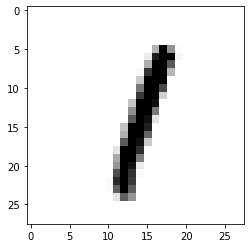

In [17]:
digit = test_images[5].reshape(28,28)
import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

### Predicted Value

Prediction is an array with 10 values, each value corresponding to the probaility of each class of digits.
There are 10 classes from 0-9 which are the indices of the predicted array therefore, argmax() would return the index/digit with the highest probability.

In [21]:
np.argmax(prediction)

1